
# Project 2: Investigate a Dataset (TMDB Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For investigate a dataset project I will analyze data about “TMDB movie”. I will be mainly focusing the relationship between components. To do this analysis, I will be looking closely at their relationship between revenues, popularity, genres. 

>Here is the lists of my questions for this data set project:
>1. What is most frequent genres?
>2. Is higher popularity make higher in revenues?
>3. How did people’s favorite genres changes over time (year by year)?


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [48]:
df = pd.read_csv('tmdb-movies-short.csv')
df.head()

<class 'pandas.core.frame.DataFrame'>


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,http://www.interstellarmovie.net/,Christopher Nolan,Mankind was born on Earth. It was never meant ...,...,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,151980023.4,5.726906e+08


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
genres                  10866 non-null object
production_companies    10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 764.1+ KB


In [9]:
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

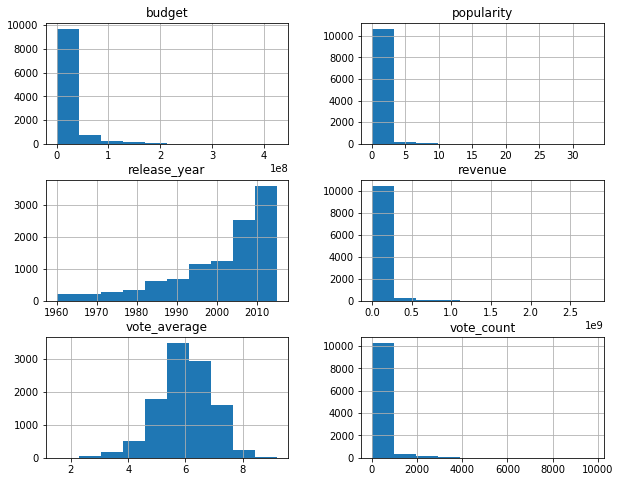

In [110]:
df.hist(figsize=(10,8));


### Data Cleaning (Drop Unneeded Columns)
>Removed: id, imdb_id, cast, homepage, director, tagline, overview, runtime, release_date, revenue_adj, budget_adj

In [33]:
df = pd.read_csv('tmdb-movies-short.csv')
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'overview', 'runtime', 'release_date', 'revenue_adj', 'budget_adj','keywords'], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,24.949134,165000000,621752480,Interstellar,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,6498,8.0,2014



### Data Cleaning (Cleaning Duplicates)
>Find and remove duplicate rows

In [5]:
#find sum of null values in each column
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [6]:
sum(df.duplicated())

0

In [7]:
#drop dupliciated
df.drop_duplicates()
sum(df.duplicated())

0

In [115]:
df.shape

(10866, 9)


### Data Cleaning (Make-up values with Zero)
>To do this Data Cleaning, I will be filling zero values with average. 

In [34]:
#Filling NaN with empty string.
df['production_companies'].fillna('', inplace=True)
df['genres'].fillna('', inplace=True)
df.to_csv(r'2.csv', index=True, header=True)

<a id='eda'></a>
## Exploratory Data Analysis

> For this section of the project I will be using compute statistics and create visualizations skills to research questions that I posed in the Introduction section.

### Research Question 1 (What is most frequent genres?)
> For this first research, I will define top 30 genres that are most frequently released of all time. 

{'Action': 13, 'Adventure': 13, 'Science Fiction': 11, 'Thriller': 10, 'Fantasy': 3, 'Drama': 4, 'Horror': 1, 'Crime': 2, 'Western': 1, 'Animation': 1, 'Family': 1}


Text(0,0.5,'Count of Genres (Frequency)')

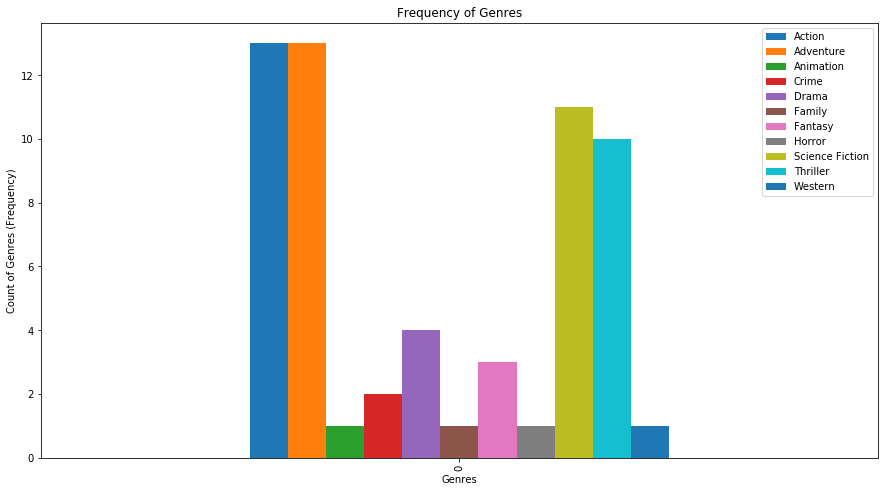

In [9]:
final_data = {} # In order to assemble the data, I made a dictionary
for row in df.genres: # retrive each row from a genre column
    split_data = row.split('|') # by using .split function, split each genres in row and name this 'split_data'
    for item in split_data: # The item refers to 21 genres listed in the data. I used "item" as valuable.
        if item in final_data:# In another words, if 21 genres are in dictionary we add +1 if not it stays at 1. 
            final_data[item] = final_data[item] + 1
        else: 
            final_data[item] = 1
print(final_data) # When final_data is printed, it shows count of each genres
new_df = pd.DataFrame([final_data]) # 
new_df.plot(kind='bar',figsize=(15,8),align='center',stacked=False)
plt.title('Frequency of Genres')
plt.xlabel('Genres')
plt.ylabel('Count of Genres (Frequency)')
# # print(final_data)
# total_genre_movies = final_data('genres')
# total_genre_movies.iloc[:20].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=12)

# genres = "Action","Adventure","Science Fiction","Thriller","Fantasy","Crime","Western","Drama","Family","Animation","Comedy","Mystery","Romance","War","History","Music","Horror","Documentary","TV Movie","no genres","Foreign"
# labels = ['Action','Adventure','Science Fiction','Thriller','Fantasy','Crime','Western','Drama','Family','Animation','Comedy','Mystery','Romance','War','History','Music','Horror','Documentary','TV Movie','no genres','Foreign']
# values = [2385,1471,1230,2908,916,1355,165,4761,1231,699,3793,810,1712,270,334,408,1637,520,167,23,188]
# plt.bar(labels,values)



<a id='eda'></a>
### Research Question 2 (Is higher popularity make higher in revenues?)
> For this first research, I will define how popularity have relation between revenues. In order to do this comparison, I compared revenue with vote count.

Text(0,0.5,'Revnue')

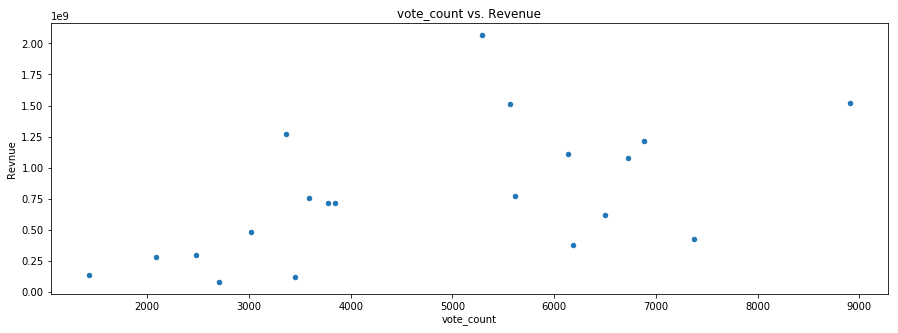

In [10]:
df.plot(x='vote_count', y='revenue', kind='scatter', figsize=(15,5))
plt.title('vote_count vs. Revenue')
plt.xlabel('vote_count')
plt.ylabel('Revnue')

### Research Question 3  (How did people’s favorite genres changes over time (year by year?))
> For this research, I will define, how people's favoriate genres changed over years. 

In [64]:
import collections # To use counter function

year = df['release_year'].unique() # To get unique years
new_data = [] # I created a new variable.

for y in year: # For year(y) in all unique years (for looping)
#     print(year)
    # subsetting for corresponding year
    y_df = df[df['release_year'] == y] # I retrieved release_year column from csv matching to y

    # converting pandas series to column
    genres_i1 = list(y_df['genres']) # I retrieved list of genres
    
    genres_f1 = [] # this will contain all the genres that we see for a given year(with repetition and "|" separator)
    
    for genre in genres_i1: # for splitting every entry in y_df[genres] with separator as "|" 
        for i in genre.split("|"): # By using .split function, I splited all individual genre and putted it in i loop
            genres_f1.append(i) # By using .append function, I appended I valuable to genres_f1

    genres_counts_each_year = dict(collections.Counter(genres_f1)) # occurrence of each genre in a year
#     print('genres_counts_each_year', genres_counts_each_year)
#     print('before', new_data)
    new_data.append(genres_counts_each_year)
#     print('after', new_data)

result = pd.DataFrame(new_data, index=year)
result.head(20)
# print(new_df)
# new_df.to_csv(r'1.csv', index=True, header=True)


,Action,Adventure,Animation,Crime,Drama,Family,Fantasy,Horror,Science Fiction,Thriller,Western
2015,3,4,NaN,NaN,NaN,NaN,1.0,NaN,4,3,NaN
2014,3,4,NaN,NaN,1.0,NaN,NaN,NaN,4,2,NaN
2012,5,2,NaN,1.0,2.0,NaN,1.0,1.0,1,3,1.0
2013,2,3,1.0,1.0,1.0,1.0,1.0,NaN,2,2,NaN


In [58]:
# print(new_df)
# new_df.plot(x='genres', y='vote_count',kind='bar',figsize=(5,5))
# new_df['genres','release_year'].value_counts().head(30).plot(kind='barh')
# plt.figure(figsize=(15,15))

In [143]:
#map all the rows of genres in a list.
genre_details = list(map(str,(df['genres'])))
# print(genre_details)
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']

#make the numpy array of year and popularity which contain all the rows of release_year and popularity column. 
year = np.array(df['release_year'])
popularity = np.array(df['popularity'])

#make a null dataframe which indexs are genres and columns are years.
popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))
#change all the values of the dataframe from NAN to zero.
popularity_df = popularity_df.fillna(value = 0.0)



# print(popularity_df)
z = 0
temp_year = ''
print(len(genre_details))
for i in genre_details:
    
    split_genre = list(map(str,i.split('|')))
#     print(split_genre)
    if(split_genre == ['']):
        continue
#     print(year[z])
#     print(popularity_df.loc[split_genre, year[z]]) 
    temp_year = year[z]
    popularity_df.loc[split_genre, [temp_year]] = popularity_df.loc[split_genre, temp_year] + popularity[z]
#     print(popularity_df)
    z+=1
popularity_df.to_csv(r'4.csv', index=True, header=True)
#     break

10866


In [146]:
#calculate the standard deviation for the accurate results.
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

# popular_genre = calculate_std(popularity_df)
popularity_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,2.674413,3.317834,1.109717,2.357228,3.675426,1.024276,3.345101,2.762950,1.367870,2.386837,...,37.807243,37.455995,60.945255,76.668674,62.814404,55.426697,70.772133,56.058004,144.555220,226.422082
Science Fiction,3.339672,0.787906,1.196412,2.204460,1.898735,0.406496,2.211383,1.814843,0.889752,2.735558,...,16.597229,24.706425,39.733235,60.947610,25.678203,48.125939,44.232776,58.329498,121.783097,193.487063
Fantasy,1.872132,0.962335,0.675085,1.566682,0.628684,0.100102,0.929393,1.106603,4.005599,1.754003,...,29.743052,31.087415,42.571058,40.261450,40.284399,31.127985,47.031822,31.152139,68.334598,57.363748
Crime,1.254870,0.374993,0.844694,1.489692,3.859109,0.708455,1.358987,2.208431,3.049814,1.041098,...,40.537588,49.392102,35.540713,28.362135,37.726581,43.065274,47.304689,63.730323,59.681012,87.911125
Western,0.291026,1.620641,0.526108,1.139321,0.434551,1.670054,1.376630,1.117509,0.166845,0.000000,...,0.430182,3.009499,0.769558,0.000000,4.579267,4.185536,0.646815,2.167356,3.736086,19.072777


[]

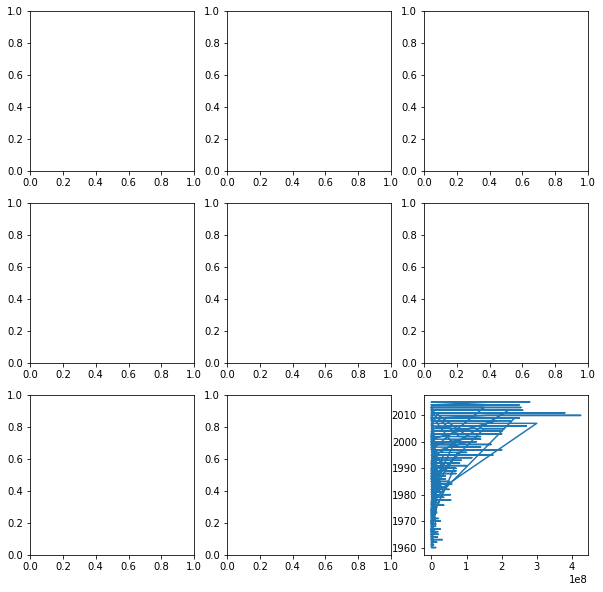

In [33]:
plt.subplots(3,3,figsize=(10,10))
plt.plot(df.budget, df.release_year)
plt.plot(kind='barh')


In [140]:
def count_genre(x):
data_plot = reader[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
     info = data.value_counts(ascending=False)
    return info

IndentationError: expected an indented block (<ipython-input-140-c5586303f7e3>, line 2)

<a id='conclusions'></a>
## Conclusions

> Question 1 conclusion: I researched what are most frequent genres that were released. As a result I figured out Drama, Thriller and Comedy were top three genres that most company produced. Also least produced genres were Western, TV Movie, and Foreign. Just by looking at this result, we can assume that Drama, Thriller, and Comedy were people’s favorite movie genres. 

> Question 2 conclusion: I researched if higher popularity (vote count) make higher in revenue. In order to do this research, I looked relationship between vote count and revenue. I choose vote count to see the popularity among people because people would make a higher vote count if they liked the movie. I demonstrated this visualization by using scatter graph. From the graph I made, I could tell that higher vote count made higher revenue. Although the scatter graph did not gave exact flow like linear graph but still there were trend were clearly demonstrated on the graph. 


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])